In [1]:
import argparse
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import uproot 
import awkward as ak
from pathlib import Path

from typing import Dict, List 
import re
import pickle
from tqdm import tqdm
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

In [2]:
training_vars = ['jet_pt', 'jet_eta', 'jet_nTracks', 'jet_trackWidth', 'jet_trackC1']
training_weight = ['equal_weight']
filename = './MLP_classifier.model'

sample_all_jets_path = '../../../samples/sample_allpt_all_jets.pkl'

sample_path = '../../../samples/sample_allpt_all_jets.pkl'
label_pt_bin = [500, 600, 800, 1000, 1200, 1500, 2000]
layers = (10, 7, 5)


This notebook explore MLP on 5 features. 

In [3]:
#FIXME No physics weights implemented in the MLP clf. 

In [3]:
sample = pd.read_pickle(sample_path)

In [4]:
sample.head()

,jet_pt,jet_eta,jet_nTracks,jet_trackWidth,jet_trackC1,jet_trackBDT,jet_PartonTruthLabelID,equal_weight,event_weight,flatpt_weight,is_forward,pt_idx,target
0,766.747925,1.298662,2.0,0.318292,0.215923,-0.192873,21.0,1.0,17.609434,2.703190e-05,1.0,1,1.0
0,680.507996,0.447689,24.0,0.064352,0.208339,0.066904,2.0,1.0,0.331535,2.858433e-07,0.0,1,0.0
1,619.839111,0.588775,34.0,0.115656,0.298206,0.232268,21.0,1.0,0.331535,1.655248e-07,1.0,1,1.0
2,721.692932,-0.716669,12.0,0.049718,0.220595,-0.169604,2.0,1.0,0.377624,3.935379e-07,0.0,1,0.0
3,697.332947,-1.042831,22.0,0.091199,0.278667,0.029374,21.0,1.0,0.377624,3.255802e-07,1.0,1,1.0


In [6]:
# Make eta positive 

sample['jet_eta'] = np.abs(sample['jet_eta'])

In [7]:
sample.head()

,jet_pt,jet_eta,jet_nTracks,jet_trackWidth,jet_trackC1,jet_trackBDT,jet_PartonTruthLabelID,equal_weight,event_weight,flatpt_weight,is_forward,pt_idx,target
0,766.747925,1.298662,2.0,0.318292,0.215923,-0.192873,21.0,1.0,17.609434,2.703190e-05,1.0,1,1.0
0,680.507996,0.447689,24.0,0.064352,0.208339,0.066904,2.0,1.0,0.331535,2.858433e-07,0.0,1,0.0
1,619.839111,0.588775,34.0,0.115656,0.298206,0.232268,21.0,1.0,0.331535,1.655248e-07,1.0,1,1.0
2,721.692932,0.716669,12.0,0.049718,0.220595,-0.169604,2.0,1.0,0.377624,3.935379e-07,0.0,1,0.0
3,697.332947,1.042831,22.0,0.091199,0.278667,0.029374,21.0,1.0,0.377624,3.255802e-07,1.0,1,1.0


In [8]:
X = sample.iloc[:, :-1]
y = sample.iloc[:, -1]

X_dev, X_test, y_dev,y_test = train_test_split(X, y, test_size=0.1, random_state=456)
X_train, X_val, y_train, y_val = train_test_split(X_dev, y_dev, test_size=0.1/0.9, random_state=789)

: 

: 

In [ ]:
event_weight_idx = X.columns.get_loc('event_weight')
equal_weight_idx = X.columns.get_loc('equal_weight')
flatpt_weight_idx = X.columns.get_loc('flatpt_weight')

In [ ]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  

scaler.fit(X_dev[training_vars])  
X_dev[training_vars] = scaler.transform(X_dev[training_vars])  
X_test[training_vars] = scaler.transform(X_test[training_vars])  

In [ ]:
clf = MLPClassifier(solver='adam', alpha=1e-5, 
                    hidden_layer_sizes=layers, early_stopping = True,
                    random_state=42, verbose=True)
                    
clf.fit(X_dev[training_vars].values, y_dev.values)

Iteration 1, loss = 0.48164641
Validation score: 0.767597
Iteration 2, loss = 0.48039189
Validation score: 0.767879
Iteration 3, loss = 0.48017900
Validation score: 0.768009
Iteration 4, loss = 0.48013913
Validation score: 0.768026
Iteration 5, loss = 0.48010805
Validation score: 0.768073
Iteration 6, loss = 0.48008160
Validation score: 0.767945
Iteration 7, loss = 0.48003975
Validation score: 0.768035
Iteration 8, loss = 0.48002481
Validation score: 0.768176
Iteration 9, loss = 0.48002057
Validation score: 0.768079
Iteration 10, loss = 0.48000910
Validation score: 0.768157
Iteration 11, loss = 0.47999798
Validation score: 0.768159
Iteration 12, loss = 0.47999696
Validation score: 0.767858
Iteration 13, loss = 0.47997330
Validation score: 0.768137
Iteration 14, loss = 0.47994534
Validation score: 0.767860
Iteration 15, loss = 0.47992521
Validation score: 0.768185
Iteration 16, loss = 0.47988981
Validation score: 0.768233
Iteration 17, loss = 0.47986927
Validation score: 0.768177
Iterat

MLPClassifier(alpha=1e-05, early_stopping=True, hidden_layer_sizes=(10, 7, 5),
              random_state=42, verbose=True)

In [ ]:
y_test_decisions = clf.predict_proba(X_test[training_vars].values)[:,1]

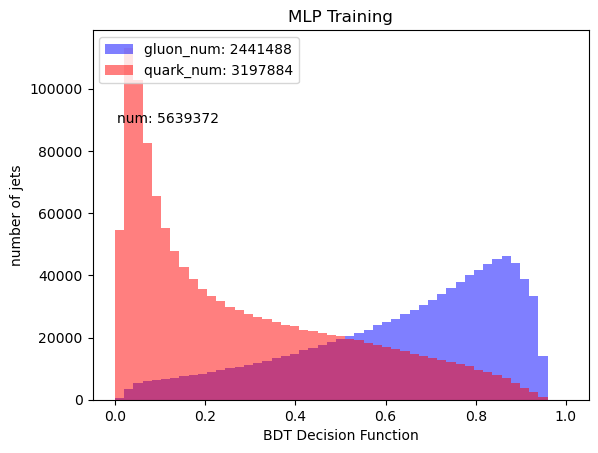

In [ ]:
y_test_gluon_id = np.where(y_test==1)[0]
y_test_quark_id = np.where(y_test==0)[0]
bins_scores = np.linspace(0, 1, 50)
plt.hist(y_test_decisions[y_test_gluon_id], weights=X_val.iloc[y_test_gluon_id, event_weight_idx], bins= bins_scores, alpha=0.5, label='gluon'+f"_num: {len(y_test_gluon_id)}", color = 'blue') # add the weights! 
plt.hist(y_test_decisions[y_test_quark_id], weights=X_val.iloc[y_test_quark_id, event_weight_idx], bins= bins_scores, alpha=0.5, label='quark'+f"_num: {len(y_test_quark_id)}", color = 'red')
plt.legend(loc='upper left')
plt.text(0.05, 0.75, f"num: {len(X_val)}", transform=plt.gca().transAxes)
plt.xlabel("BDT Decision Function")
plt.ylabel("number of jets")
plt.title(r"MLP Training")
plt.savefig("MLP_Training.png")
plt.show()

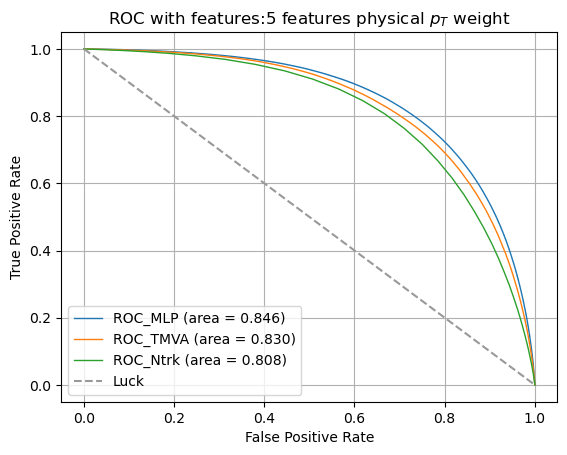

In [ ]:
from sklearn.metrics import roc_curve, auc

def Draw_ROC_all(y, decisions, y_tmva, y_ntrk, X_weight, features):
    # Compute ROC curve and area under the curve
    fpr, tpr, thresholds = roc_curve(y, decisions, sample_weight = X_weight)
    fpr_tmva, tpr_tmva, thresholds_tmva = roc_curve(y, y_tmva, sample_weight = X_weight)
    fpr_ntrk, tpr_ntrk, thresholds_ntrk =  roc_curve(y, y_ntrk, sample_weight = X_weight)

    roc_auc = auc(fpr, tpr)
    roc_auc_tmva = auc(fpr_tmva, tpr_tmva)
    roc_auc_ntrk = auc(fpr_ntrk, tpr_ntrk)


    plt.plot(1-fpr, tpr, lw=1, label='ROC_MLP (area = %0.3f)'%(roc_auc))
    plt.plot(1-fpr_tmva, tpr_tmva, lw=1, label='ROC_TMVA (area = %0.3f)'%(roc_auc_tmva))
    plt.plot(1-fpr_ntrk, tpr_ntrk, lw=1, label='ROC_Ntrk (area = %0.3f)'%(roc_auc_ntrk))

    plt.plot([0, 1], [1, 0], '--', color=(0.6, 0.6, 0.6), label='Luck')
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC with features:{features}'+r" physical $p_{T}$ weight")
    plt.legend(loc="lower left")
    plt.grid()
    plt.savefig("ROC.png")
    plt.show()

Draw_ROC_all(y_test, y_test_decisions, y_tmva=X_test.iloc[:,X_test.columns.get_loc('jet_trackBDT')] , y_ntrk=X_test.iloc[:,X_test.columns.get_loc('jet_nTracks')], X_weight=X_test['event_weight'], features="5 features")


In [ ]:
import pickle
pickle.dump(clf, open(filename, 'wb'))

with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
    

# Overtraining Validation

Text(0.5, 1.0, 'Overtraining test')

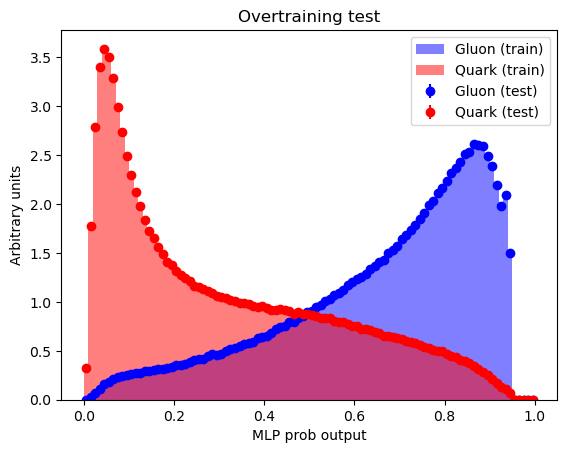

In [ ]:
y_test_decisions = clf.predict_proba(X_test[training_vars].values)[:,1]
y_dev_decisions = clf.predict_proba(X_dev[training_vars].values)[:,1]


y_test_decisions_gluon = y_test_decisions[np.where(y_test==1)]
y_test_decisions_quark = y_test_decisions[np.where(y_test==0)]
y_dev_decisions_gluon = y_dev_decisions[np.where(y_dev==1)]
y_dev_decisions_quark = y_dev_decisions[np.where(y_dev==0)]
decisions = []
decisions.append(y_dev_decisions_gluon)
decisions.append(y_dev_decisions_quark)
decisions.append(y_test_decisions_gluon)
decisions.append(y_test_decisions_quark)


custom_bins = np.linspace(0, 1, 101)
custom_bin_width = (custom_bins[1] - custom_bins[0])
custom_bin_center = (custom_bins[:-1] + custom_bins[1:]) / 2

fig, ax = plt.subplots()
ax.hist(decisions[0], weights = X_dev.iloc[np.where(y_dev==1)[0], event_weight_idx],
            color='b', alpha=0.5, bins=custom_bins,
            histtype='stepfilled', density=True,
            label='Gluon (train)')
ax.hist(decisions[1], weights = X_dev.iloc[np.where(y_dev==0)[0], event_weight_idx],
            color='r', alpha=0.5, bins=custom_bins,
            histtype='stepfilled', density=True,
            label='Quark (train)')

hist, bins = np.histogram(decisions[2], weights=X_test.iloc[np.where(y_test==1)[0], event_weight_idx],
                            bins=custom_bins,  density=True)
scale = len(decisions[2]) / sum(hist)
err = np.sqrt(hist * scale) / scale

plt.errorbar(custom_bin_center, hist, yerr=err, fmt='o', c='b', label='Gluon (test)')

hist, bins = np.histogram(decisions[3], weights=X_test.iloc[np.where(y_test==0)[0], event_weight_idx],
                            bins=custom_bins, density=True)
scale = len(decisions[2]) / sum(hist)
err = np.sqrt(hist * scale) / scale

plt.errorbar(custom_bin_center, hist, yerr=err, fmt='o', c='r', label='Quark (test)')
plt.xlabel("MLP prob output")
plt.ylabel("Arbitrary units")
plt.legend(loc='best')
plt.title("Overtraining test")


# Test Extraction on Current Sample

## inclusive

### feature distribution

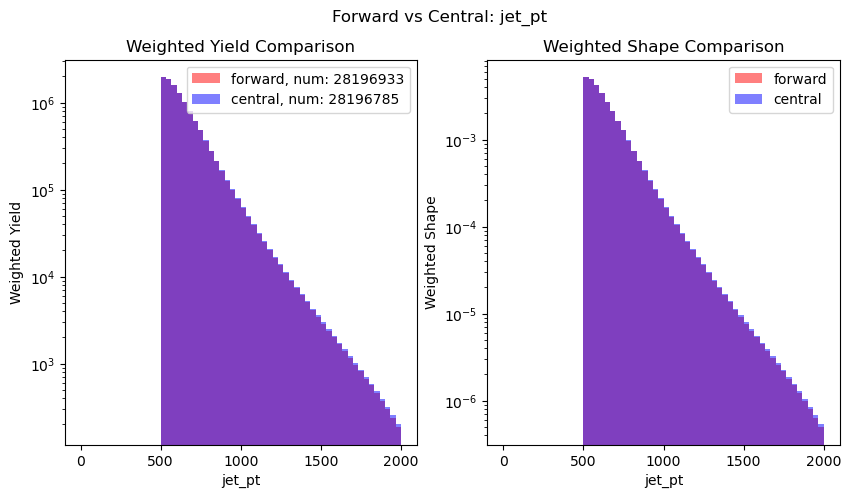

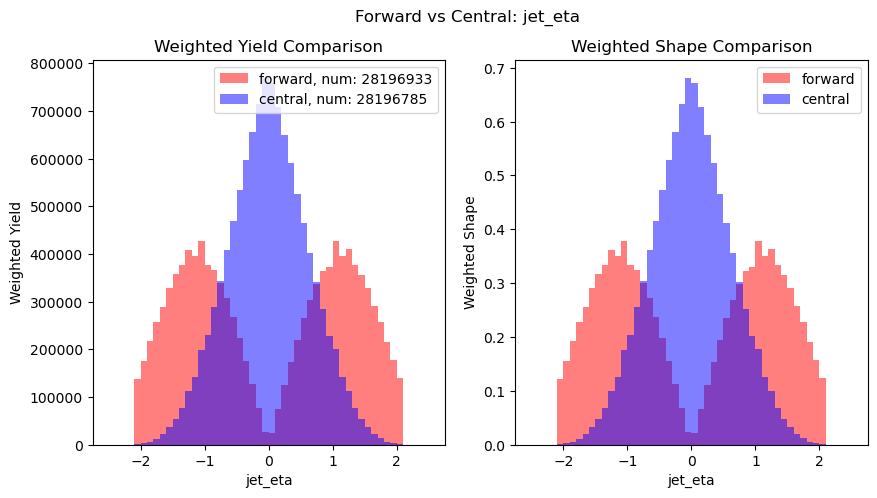

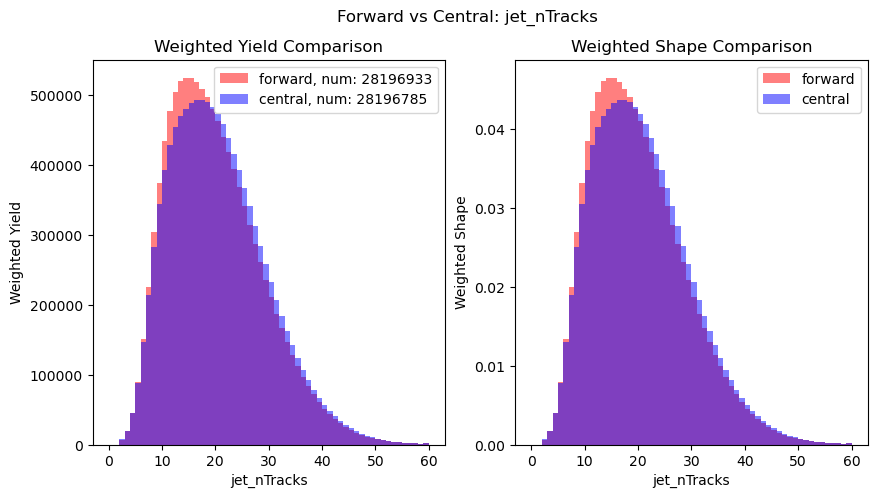

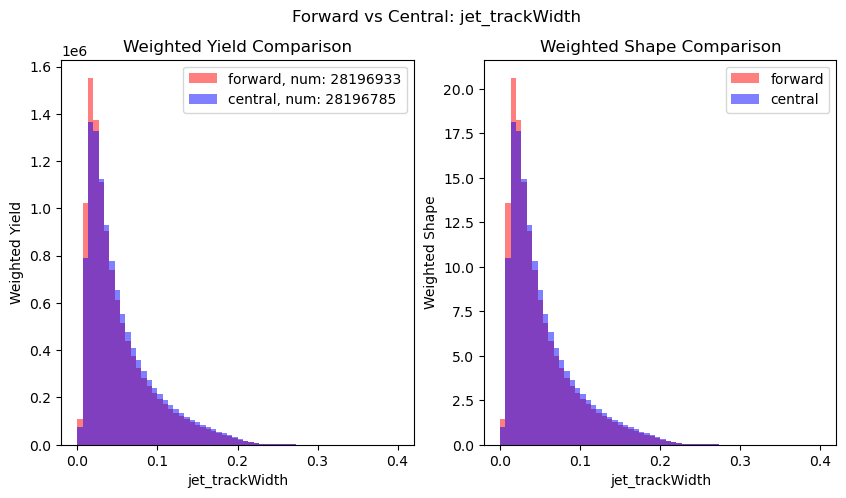

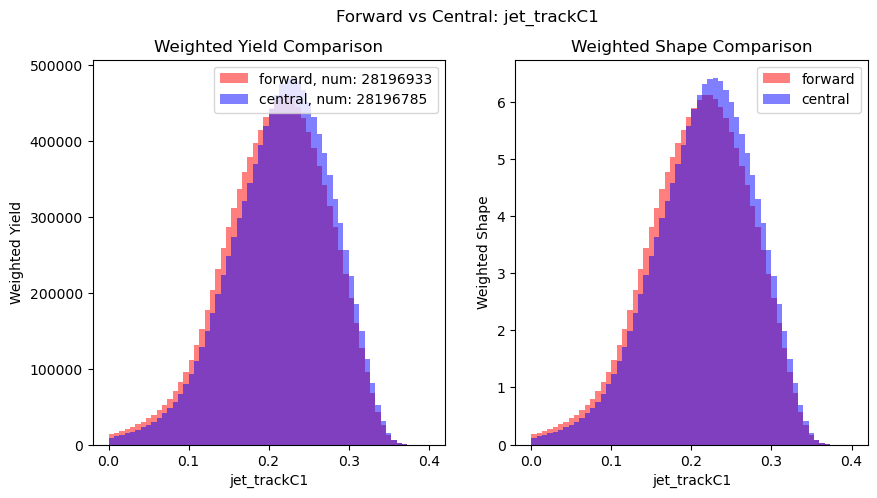

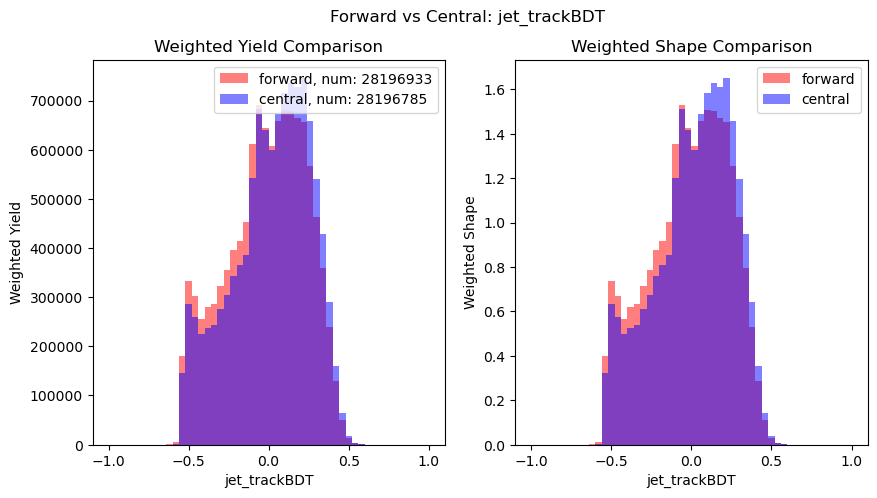

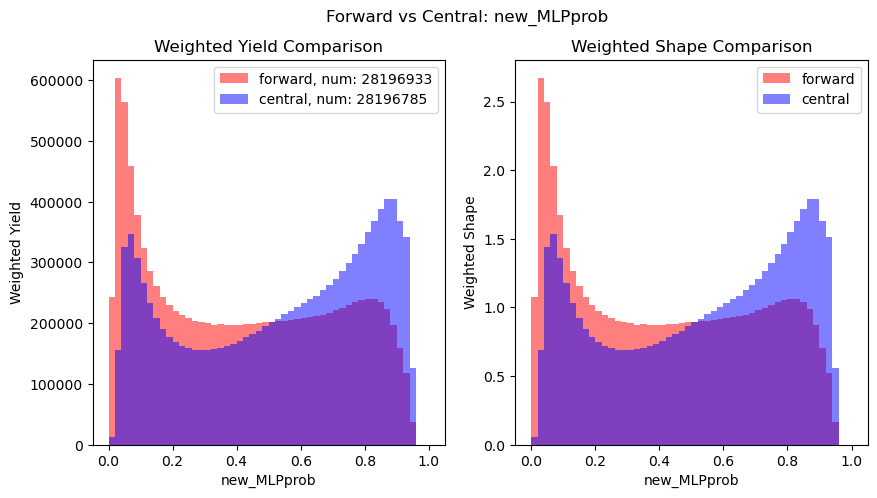

In [15]:
y_sample = clf.predict_proba(scaler.transform(sample[training_vars]))[:,1]
sample['new_MLPprob'] = y_sample

features = [*sample.columns[:6]] + ['new_MLPprob'] 
HistBins = {
    features[0] : np.linspace(0, 2000, 61), 
    features[1] : np.linspace(-2.5, 2.5, 51),
    features[2] : np.linspace(0, 60, 61),
    features[3] : np.linspace(0, 0.4, 61), 
    features[4] : np.linspace(0, 0.4, 61), 
    features[5] : np.linspace(-1.0, 1.0, 51), 
    features[6] : np.linspace(0.0, 1.0, 51),
}

sample_forward = sample[sample['is_forward']==1]
sample_central = sample[sample['is_forward']==0]

for feature_name in features:
    custom_bins = HistBins[feature_name]
    fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize = (10,5))
    ax0.hist(sample_forward[feature_name], bins = custom_bins, weights = sample_forward['event_weight'], label = f'forward, num: {len(sample_forward)}', color='red', alpha = 0.5)
    ax0.hist(sample_central[feature_name], bins = custom_bins, weights = sample_central['event_weight'], label = f'central, num: {len(sample_central)}', color='blue', alpha = 0.5)
    ax0.legend()
    ax0.set_xlabel(feature_name)
    ax0.set_ylabel(f"Weighted Yield")
    ax0.set_title(f"Weighted Yield Comparison")

    if feature_name == 'jet_pt':
        ax0.set_yscale('log')

    ax1.hist(sample_forward[feature_name], bins = custom_bins, weights = sample_forward['event_weight'], label = 'forward', color='red', alpha = 0.5, density=True)
    ax1.hist(sample_central[feature_name], bins = custom_bins, weights = sample_central['event_weight'], label = 'central', color='blue', alpha = 0.5, density=True)
    ax1.legend()
    ax1.set_xlabel(feature_name)
    ax1.set_ylabel(f"Weighted Shape")
    ax1.set_title(f"Weighted Shape Comparison")
    if feature_name == 'jet_pt':
        ax1.set_yscale('log')
    fig.suptitle(f"Forward vs Central: {feature_name}")

    plt.plot()
    

### test extraction

Text(0.5, 0.98, 'new_MLPprob')

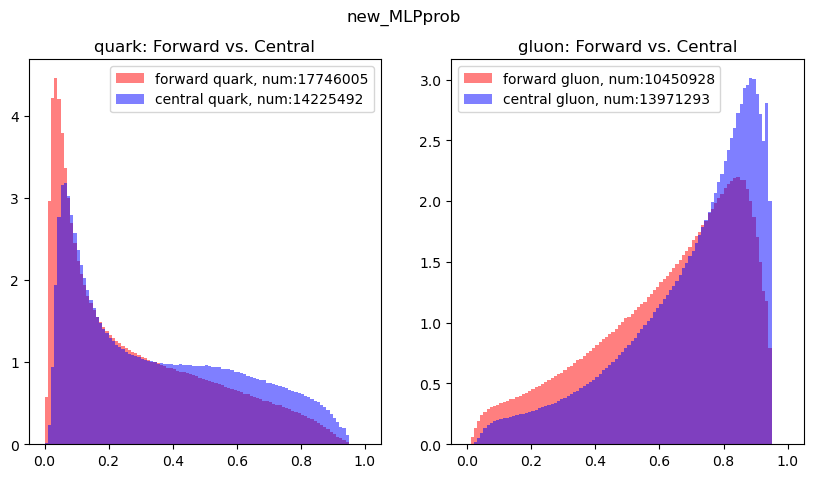

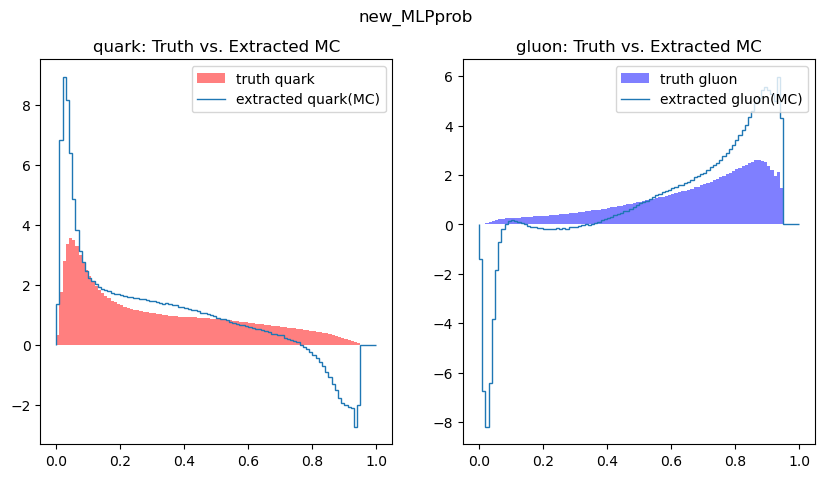

In [16]:
forward_quark = sample[(sample['is_forward']==1) &(sample['target']==0)]
forward_gluon = sample[(sample['is_forward']==1) &(sample['target']==1)]
central_quark = sample[(sample['is_forward']==0) &(sample['target']==0)]
central_gluon = sample[(sample['is_forward']==0) &(sample['target']==1)]
forward = sample[(sample['is_forward']==1)]
central = sample[(sample['is_forward']==0)]
quark = sample[sample['target']==0]
gluon = sample[sample['target']==1]

newbdt_bins = np.linspace(0.0, 1.0, 101)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
feature = 'new_MLPprob'
ax[0].hist(forward_quark[feature], bins=newbdt_bins, weights=forward_quark['event_weight'], 
          label=f'forward quark, num:{len(forward_quark)}', color='red', alpha = 0.5, density=True)
ax[0].hist(central_quark[feature], bins=newbdt_bins, weights=central_quark['event_weight'], 
          label=f'central quark, num:{len(central_quark)}', color='blue', alpha = 0.5, density=True)
ax[0].legend()
ax[0].set_title('quark: Forward vs. Central')

ax[1].hist(forward_gluon[feature], bins=newbdt_bins, weights=forward_gluon['event_weight'],
          label=f'forward gluon, num:{len(forward_gluon)}', color='red', alpha = 0.5, density=True)
ax[1].hist(central_gluon[feature], bins=newbdt_bins, weights=central_gluon['event_weight'], 
          label=f'central gluon, num:{len(central_gluon)}', color='blue', alpha = 0.5, density=True)
ax[1].set_title('gluon: Forward vs. Central')
ax[1].legend()
fig.suptitle(feature)




n_forward_quark = len(forward_quark)
n_central_quark = len(central_quark)
n_forward = len(forward)
n_central = len(central)

frac_forward_quark = n_forward_quark / n_forward
frac_central_quark = n_central_quark / n_central

frac_forward_gluon = 1 - frac_forward_quark
frac_central_gluon = 1 - frac_central_quark

f = np.array([[frac_forward_quark,  frac_forward_gluon], [frac_central_quark, frac_central_gluon]])
f_inv = np.linalg.inv(f)


# Do a simple extraction test
# MC closure 
feature = 'new_MLPprob'
newbdt_bins = np.linspace(0.0, 1.0, 101)
hist_forward, _ = np.histogram(forward[feature], newbdt_bins, weights=forward['event_weight'], density = True)
hist_central, _ = np.histogram(central[feature], newbdt_bins, weights=central['event_weight'], density = True)


extract_p_Quark = f_inv[0][0] * hist_forward + f_inv[0][1]* hist_central 
extract_p_Gluon = f_inv[1][0] * hist_forward + f_inv[1][1]* hist_central 

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
ax[0].hist(quark[feature], bins=newbdt_bins, weights=quark['event_weight'], 
          label=f'truth quark', color='red', alpha = 0.5, density=True)
ax[0].stairs(values=extract_p_Quark, edges=newbdt_bins, label=f'extracted quark(MC)')
ax[0].legend()
ax[0].set_title('quark: Truth vs. Extracted MC')

ax[1].hist(gluon[feature], bins=newbdt_bins, weights=gluon['event_weight'], 
          label=f'truth gluon', color='blue', alpha = 0.5, density=True)
ax[1].stairs(values=extract_p_Gluon, edges=newbdt_bins, label=f'extracted gluon(MC)')
ax[1].legend()
ax[1].set_title('gluon: Truth vs. Extracted MC')

fig.suptitle(feature)


## pt bins 

### MLPprob distribution

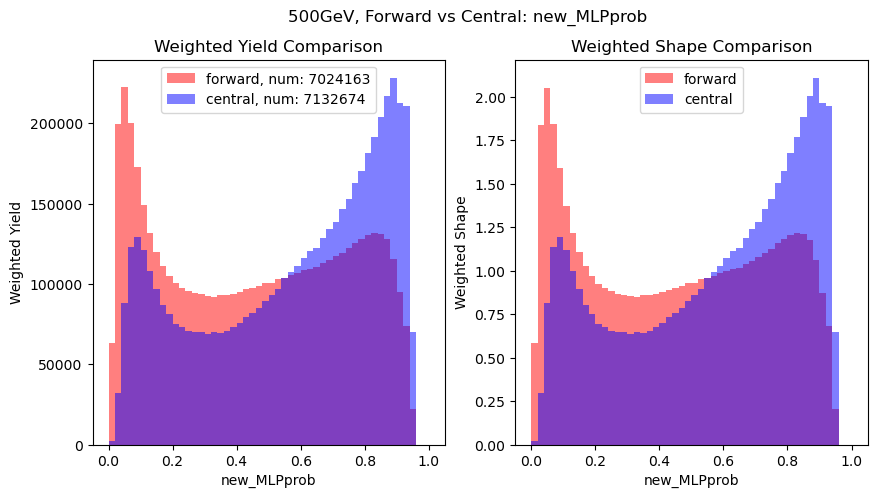

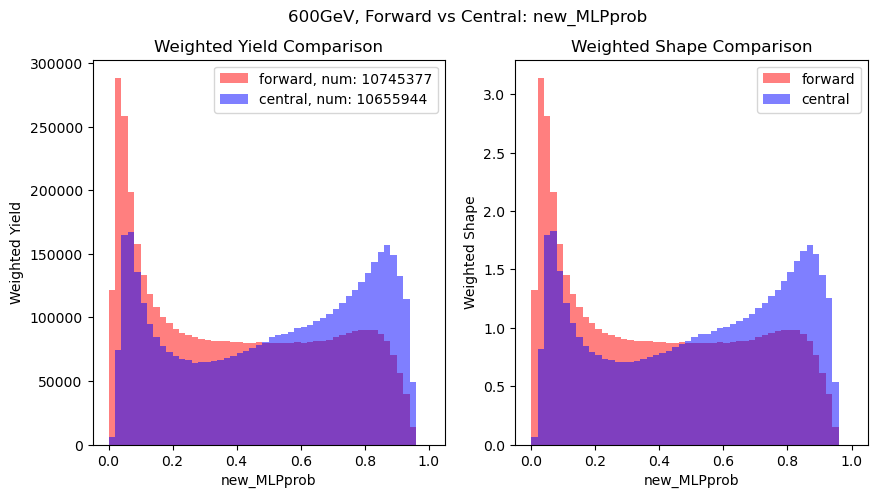

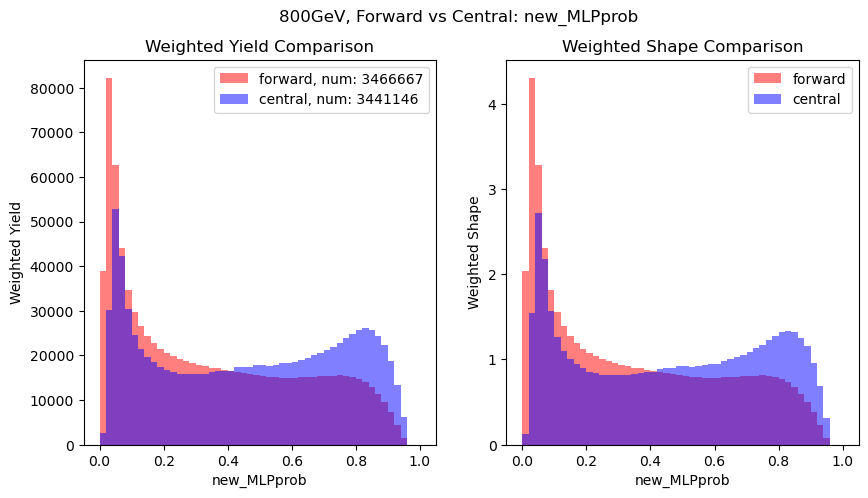

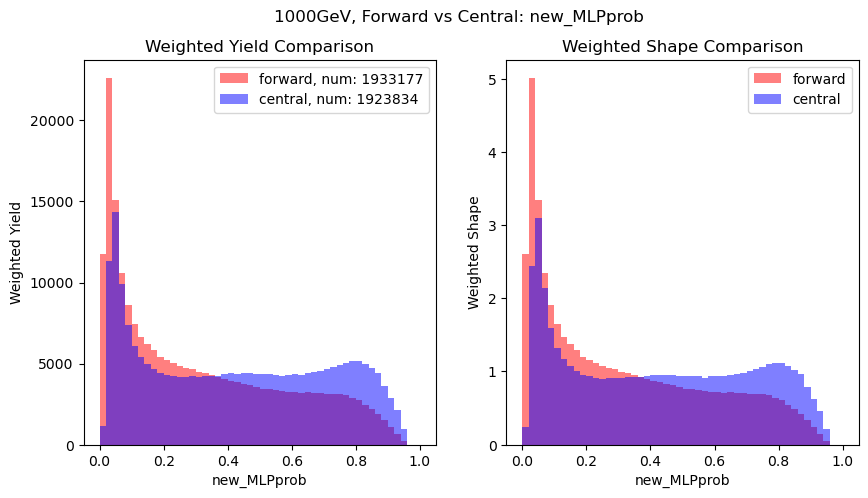

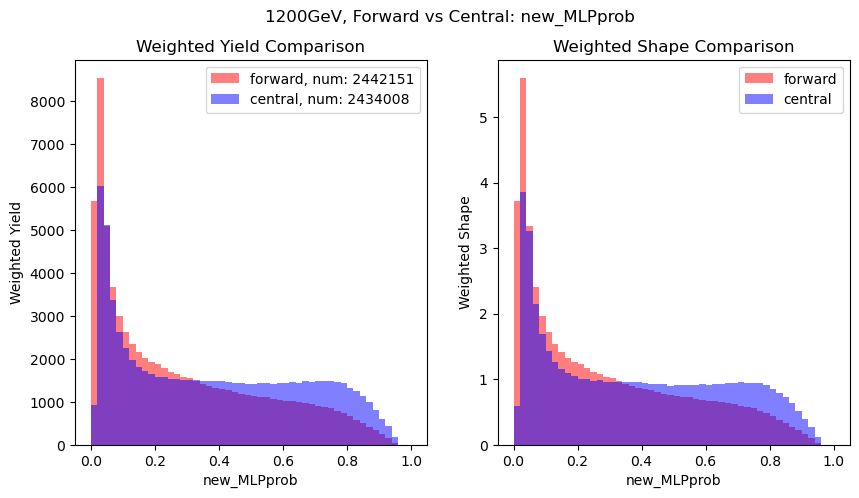

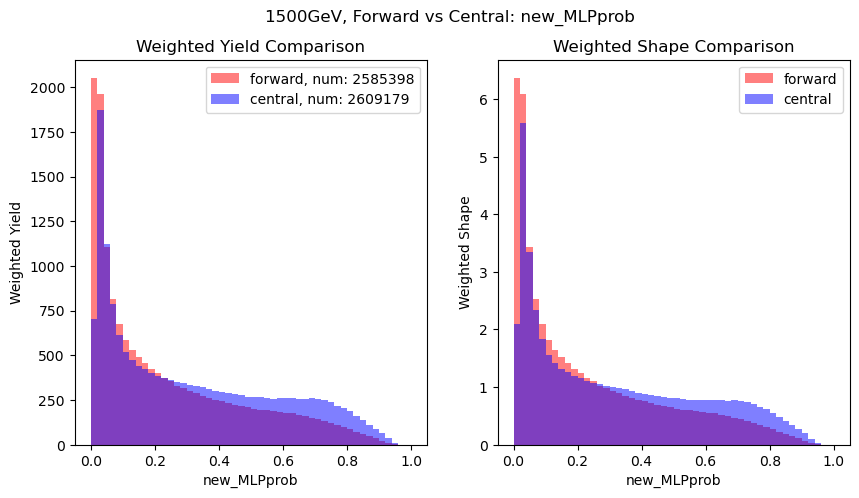

In [17]:
for pt_idx, pt in enumerate(label_pt_bin[:-1]):
    sample_pt = sample[sample['pt_idx'] == pt_idx] 

    sample_forward = sample_pt[sample_pt['is_forward']==1]
    sample_central = sample_pt[sample_pt['is_forward']==0]

    for feature_name in features[-1:]:
        custom_bins = HistBins[feature_name]
        fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize = (10,5))
        ax0.hist(sample_forward[feature_name], bins = custom_bins, weights = sample_forward['event_weight'], label = f'forward, num: {len(sample_forward)}', color='red', alpha = 0.5)
        ax0.hist(sample_central[feature_name], bins = custom_bins, weights = sample_central['event_weight'], label = f'central, num: {len(sample_central)}', color='blue', alpha = 0.5)
        ax0.legend()
        ax0.set_xlabel(feature_name)
        ax0.set_ylabel(f"Weighted Yield")
        ax0.set_title(f"Weighted Yield Comparison")
        if feature_name == 'jet_pt':
            ax0.set_yscale('log')

        ax1.hist(sample_forward[feature_name], bins = custom_bins, weights = sample_forward['event_weight'], label = 'forward', color='red', alpha = 0.5, density=True)
        ax1.hist(sample_central[feature_name], bins = custom_bins, weights = sample_central['event_weight'], label = 'central', color='blue', alpha = 0.5, density=True)
        ax1.legend()
        ax1.set_xlabel(feature_name)
        ax1.set_ylabel(f"Weighted Shape")
        ax1.set_title(f"Weighted Shape Comparison")
        if feature_name == 'jet_pt':
            ax1.set_yscale('log')
        fig.suptitle(f"{pt}GeV, Forward vs Central: {feature_name}")
        plt.plot()
    

### test extraction

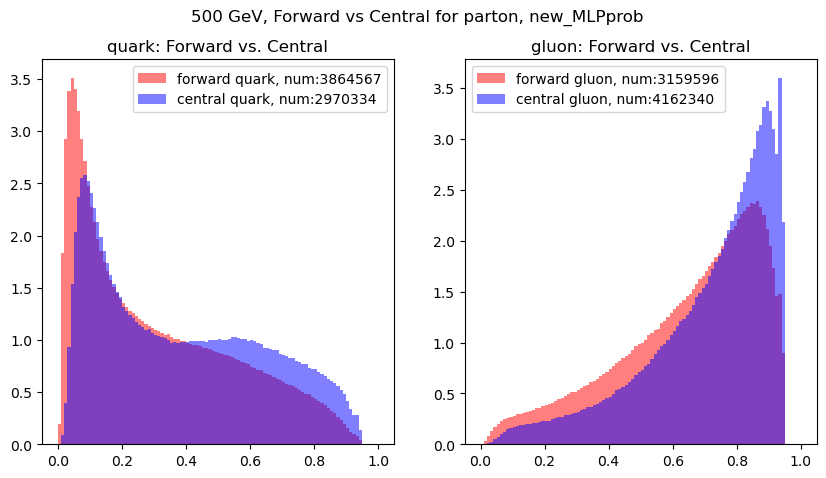

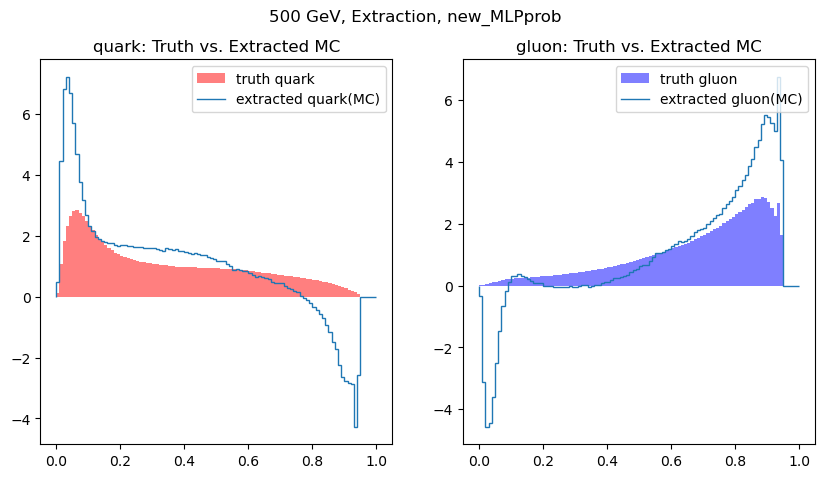

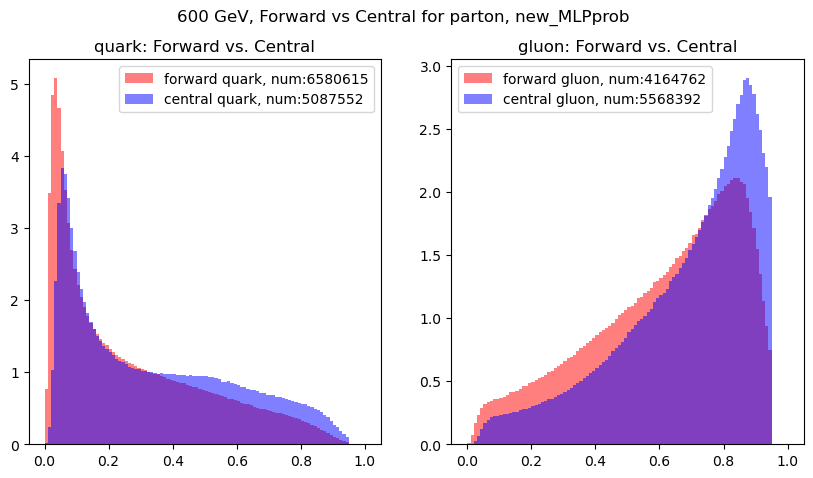

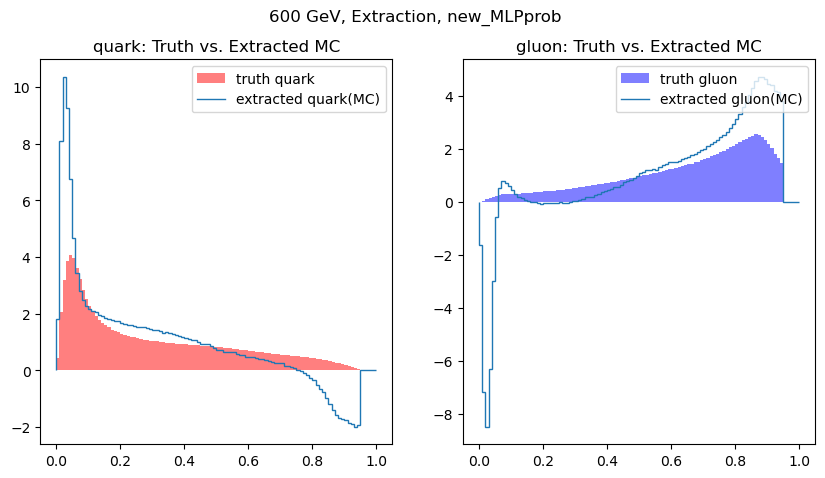

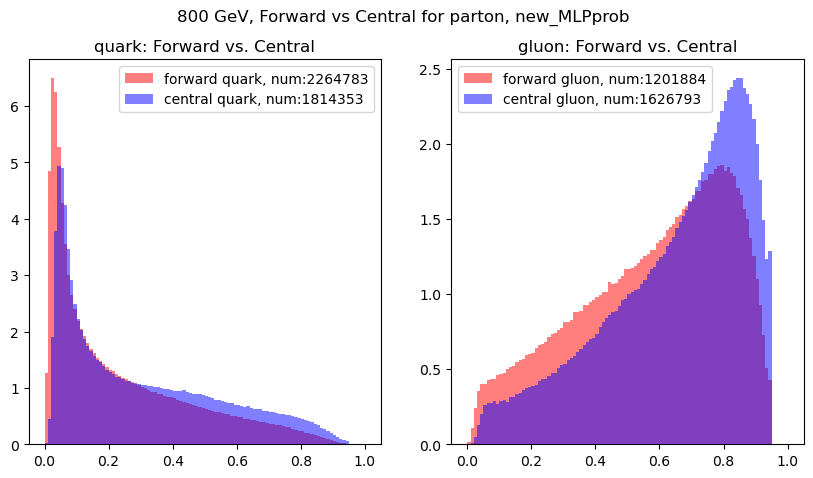

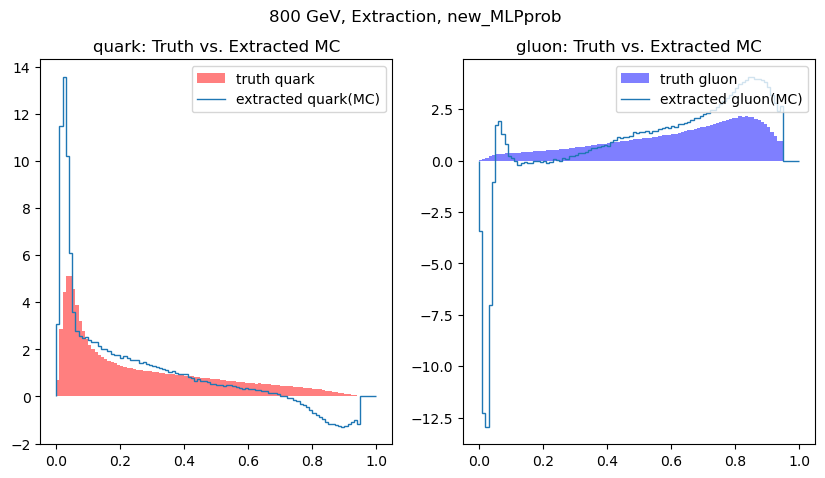

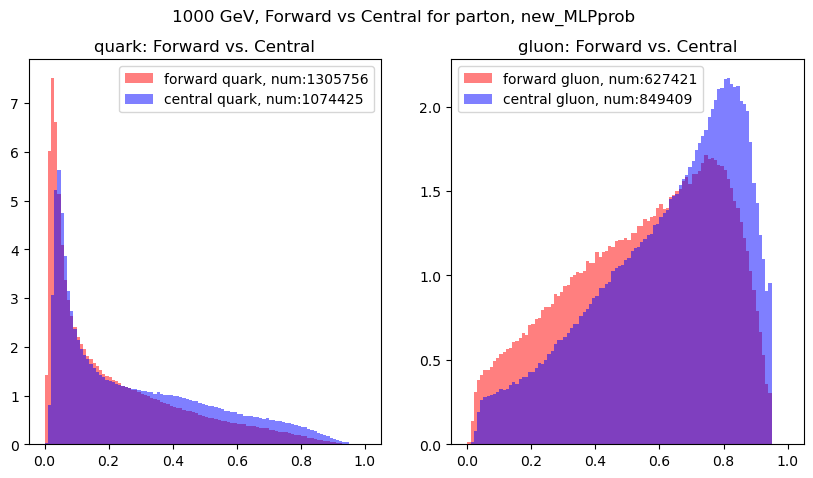

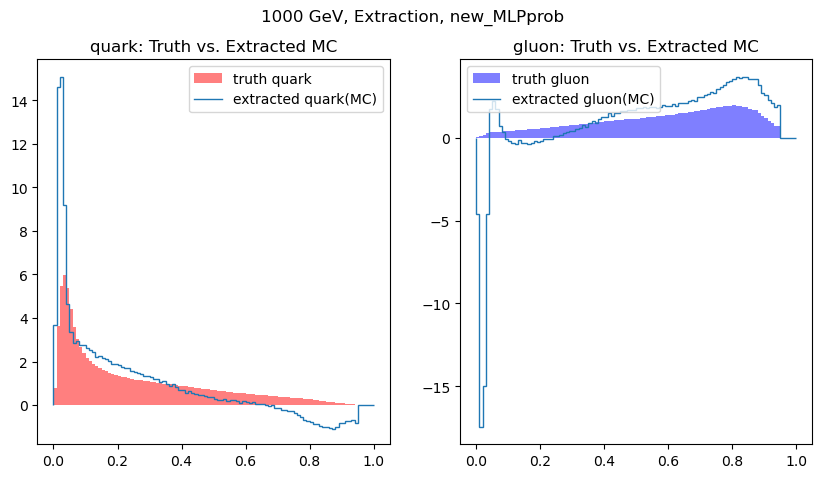

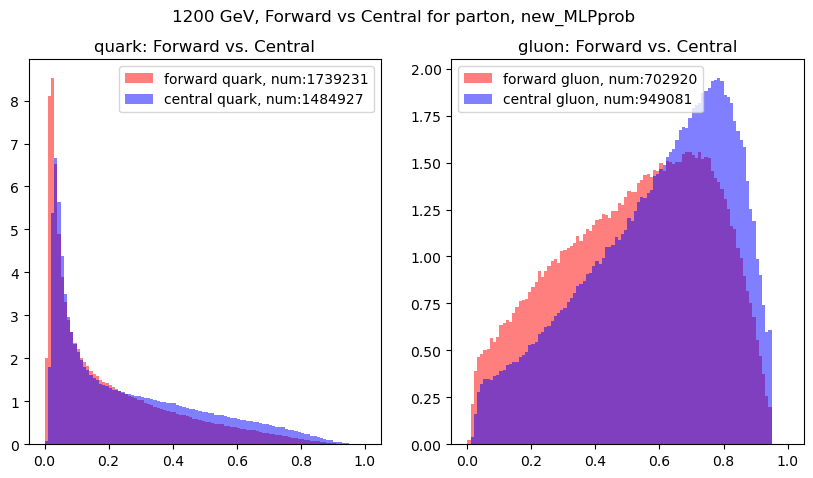

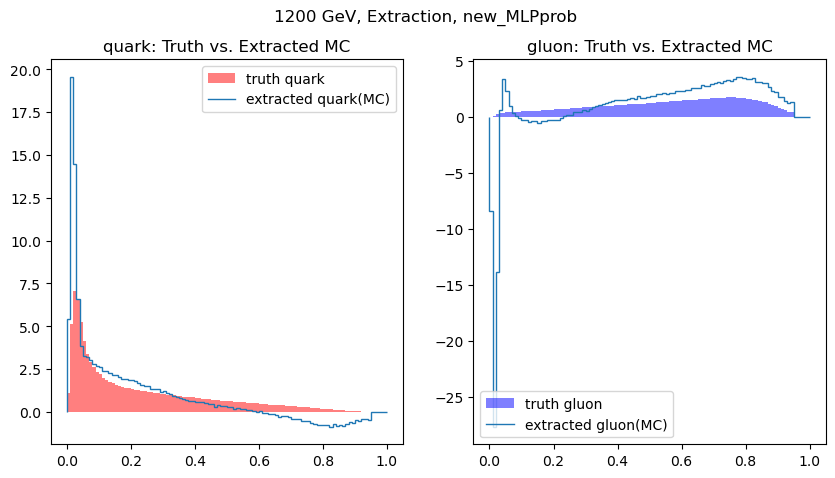

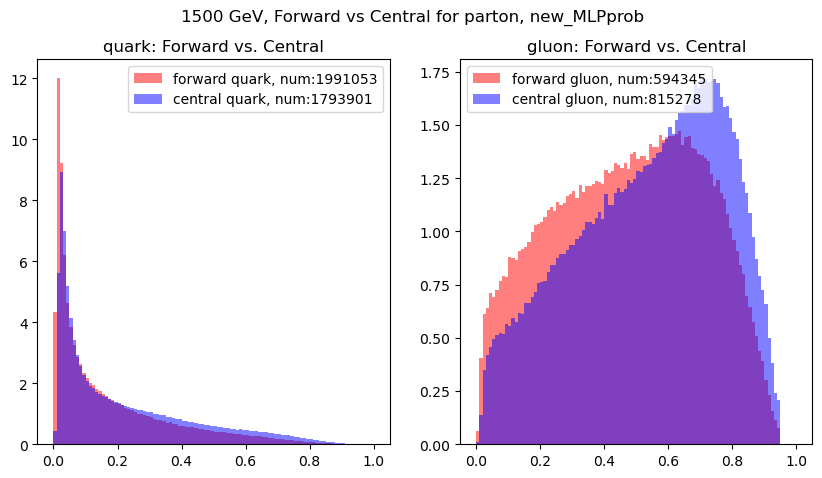

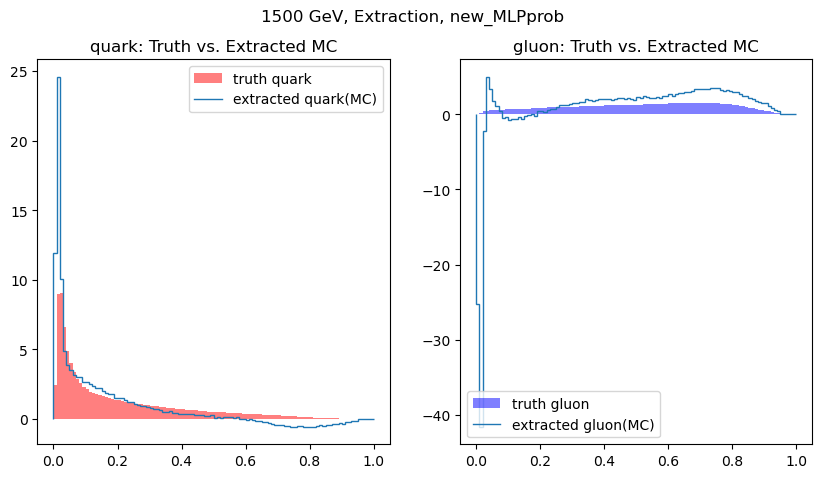

In [18]:
for pt_idx, pt in enumerate(label_pt_bin[:-1]):
    sample_pt = sample[sample['pt_idx'] == pt_idx] 
    _sample = sample_pt
    forward_quark = _sample[(_sample['is_forward']==1) &(_sample['target']==0)]
    forward_gluon = _sample[(_sample['is_forward']==1) &(_sample['target']==1)]
    central_quark = _sample[(_sample['is_forward']==0) &(_sample['target']==0)]
    central_gluon = _sample[(_sample['is_forward']==0) &(_sample['target']==1)]
    forward = _sample[(_sample['is_forward']==1)]
    central = _sample[(_sample['is_forward']==0)]
    quark = _sample[_sample['target']==0]
    gluon = _sample[_sample['target']==1]

    newbdt_bins = np.linspace(0.0, 1.0, 101)
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
    feature = 'new_MLPprob'
    ax[0].hist(forward_quark[feature], bins=newbdt_bins, weights=forward_quark['event_weight'], 
            label=f'forward quark, num:{len(forward_quark)}', color='red', alpha = 0.5, density=True)
    ax[0].hist(central_quark[feature], bins=newbdt_bins, weights=central_quark['event_weight'], 
            label=f'central quark, num:{len(central_quark)}', color='blue', alpha = 0.5, density=True)
    ax[0].legend()
    ax[0].set_title('quark: Forward vs. Central')

    ax[1].hist(forward_gluon[feature], bins=newbdt_bins, weights=forward_gluon['event_weight'],
            label=f'forward gluon, num:{len(forward_gluon)}', color='red', alpha = 0.5, density=True)
    ax[1].hist(central_gluon[feature], bins=newbdt_bins, weights=central_gluon['event_weight'], 
            label=f'central gluon, num:{len(central_gluon)}', color='blue', alpha = 0.5, density=True)
    ax[1].set_title('gluon: Forward vs. Central')
    ax[1].legend()
    fig.suptitle(f"{pt} GeV, Forward vs Central for parton, {feature}")




    n_forward_quark = len(forward_quark)
    n_central_quark = len(central_quark)
    n_forward = len(forward)
    n_central = len(central)

    frac_forward_quark = n_forward_quark / n_forward
    frac_central_quark = n_central_quark / n_central

    frac_forward_gluon = 1 - frac_forward_quark
    frac_central_gluon = 1 - frac_central_quark

    f = np.array([[frac_forward_quark,  frac_forward_gluon], [frac_central_quark, frac_central_gluon]])
    f_inv = np.linalg.inv(f)


    # Do a simple extraction test
    # MC closure 
    feature = 'new_MLPprob'
    newbdt_bins = np.linspace(0.0, 1.0, 101)
    hist_forward, _ = np.histogram(forward[feature], newbdt_bins, weights=forward['event_weight'], density = True)
    hist_central, _ = np.histogram(central[feature], newbdt_bins, weights=central['event_weight'], density = True)


    extract_p_Quark = f_inv[0][0] * hist_forward + f_inv[0][1]* hist_central 
    extract_p_Gluon = f_inv[1][0] * hist_forward + f_inv[1][1]* hist_central 

    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
    ax[0].hist(quark[feature], bins=newbdt_bins, weights=quark['event_weight'], 
            label=f'truth quark', color='red', alpha = 0.5, density=True)
    ax[0].stairs(values=extract_p_Quark, edges=newbdt_bins, label=f'extracted quark(MC)')
    ax[0].legend()
    ax[0].set_title('quark: Truth vs. Extracted MC')

    ax[1].hist(gluon[feature], bins=newbdt_bins, weights=gluon['event_weight'], 
            label=f'truth gluon', color='blue', alpha = 0.5, density=True)
    ax[1].stairs(values=extract_p_Gluon, edges=newbdt_bins, label=f'extracted gluon(MC)')
    ax[1].legend()
    ax[1].set_title('gluon: Truth vs. Extracted MC')

    fig.suptitle(f"{pt} GeV, Extraction, {feature}")